In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda','Honda','HONDA'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [139]:
%matplotlib inline
import json
import string
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')

tweets_data = []
tweets_file = open(path.join(d, 'cancer_tweets_data.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

9208


In [133]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'] for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

In [111]:
tweets.head()

,text,lang,retweeted
0,"RT @LeVraiHoroscope: Les signes astrologiques les plus charmants sont les #Balance, #Cancer, #Lion, #Taureau et #Poissons.",fr,False
1,@Kevin_Sheedy Please RT? Goldilocks Dave is doing Worlds Greatest Shave 4 cancer. Follow link 2 donate. http://t.co/SXdvyjyKso #shavedave,en,False
2,RT @Kopite2014: @empireofthekop Please help my 5 year old Tomas &amp; #LFC fan fight cancer with a RT to spread the word. #donate #YNWA https:/…,en,False
3,RT @CancerTerms: Watch out! One thing to remember about #Cancer's is that even the cutest of crabs still have claws.,en,False
4,"RT @yelllanayaa: FR! ♋️ RT@sbyfieldd: Cancer probs RT""@yelllanayaa: Don't argue with me, I'm so petty and I'll go all day till you let me h…",en,False


In [134]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]
english_tweets.drop_duplicates(subset='text');

In [135]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line

text = text.replace("'s",'')

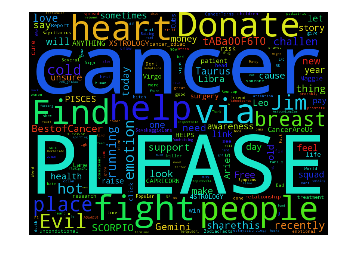

In [136]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
    'rt',
    'ebay',
    'co',
    't',
    'amp',
    'https'
]

for word in additional_words:
    STOPWORDS.add(word)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#honda_mask = imread(path.join(d, "honda_logo_mask.png"), flatten=True)
#wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)

# generate word cloud
wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "cancer_word_cloud.png"))

# show
plt.imshow(wc)
plt.axis("off")
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

In [123]:
prevent = tweets[(tweets['text'].str.contains('food')) | (tweets['text'].str.contains('nutrient'))]

In [124]:
prevent['text']

69                                                                                  RT @RealFitnessFun: Cancer fighting foods: http://t.co/HFvjQacxuA
186      RT @Beyond_GM: If #glyphosate causes cancer why are we putting it in on our crops, on our soil and in our food? #dumbhumans http://t.co/kPH…
360      RT @Beyond_GM: If #glyphosate causes cancer why are we putting it in on our crops, on our soil and in our food? #dumbhumans http://t.co/kPH…
378                                   #Cancer and #Taurus make great lovers and great business partners. And both share a desirable love for food. :)
406                 RT @cancer_zdiac: #Cancer and #Taurus make great lovers and great business partners. And both share a desirable love for food. :)
424                                                                                 RT @RealFitnessFun: Cancer fighting foods: http://t.co/HFvjQacxuA
428                 RT @cancer_zdiac: #Cancer and #Taurus make great lovers and great business partn

In [115]:
wc.process_text(text)[:50]

[('cancer', 1.0),
 ('help', 0.07539267015706806),
 ('Please', 0.06450261780104712),
 ('https', 0.06031413612565445),
 ('emotion', 0.058429319371727746),
 ('hot', 0.058219895287958116),
 ('recently', 0.05780104712041885),
 ('running', 0.05759162303664921),
 ('cold', 0.05738219895287958),
 ('challen', 0.05675392670157068),
 ('people', 0.05654450261780105),
 ('breast', 0.05633507853403141),
 ('fight', 0.047958115183246074),
 ('donate', 0.04586387434554974),
 ('love', 0.04104712041884817),
 ('via', 0.03518324607329843),
 ('need', 0.034973821989528794),
 ('look', 0.0343455497382199),
 ('SCORPIO', 0.033717277486910995),
 ('Taurus', 0.03329842931937173),
 ('say', 0.03225130890052356),
 ('awareness', 0.03183246073298429),
 ('will', 0.03162303664921466),
 ('support', 0.03162303664921466),
 ('thing', 0.03120418848167539),
 ('year', 0.03120418848167539),
 ('old', 0.030785340314136125),
 ('Gemini', 0.02994764397905759),
 ('let', 0.02994764397905759),
 ('link', 0.02994764397905759),
 ('new', 0.0293

In [116]:
STOPWORDS

{'',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'co',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'ebay',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 